In [1]:
"""
April 09, 2020

Birte Schmidtmann (birte.schmidtmann@uni-hamburg.de)

GNU General Public License
"""

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os as os
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual, Button, Layout
import ipywidgets as widgets
import seaborn as sns             

In [2]:
# initial conditions for Hamburg as of 27.04.:
N = 1841179
ICUtotal=956
gesInfiziert=5069
L0 = 200 #geschätzt
Im0 = 120*2/3
Is0 = 120*1/3
ICU0 = 14
H0 = 37-ICU0
R0 = 4600
D0 = 215
Q0 = int(0.01*N)
S0 = N - L0 - Im0 - Is0 -H0 -ICU0 - R0 -D0 -Q0 # susceptible
#
#----- time steps -----
#
tsteps = 60 # number  of timesteps of simulation (days)
t = np.linspace(1, tsteps, 10*tsteps) # time steps (days) 
#
#----- parameter -----
#
beta1,beta2,beta3,beta4,beta5 = 3.0, 1./3., 1./3., 0.1, 0.05  # attack rate, [beta]=1/time, Anzahl Kontakte pro Tag
gamma1=gamma2=gamma3=gamma4 = 1./3.                       # recovery rate, [gamma]=1/time
alpha1,alpha2,alpha3 = 0.2,0.5,0.2
eps1,eps2,eps3 = 0.2,0.1,0.7
delta1,delta2  = 0.01, 0.05
kappa_m,kappa_s,kappa_H,kappa_ICU,kappa_Q = 0.8, 0.2,0.2,0.1,0.01

In [3]:
def dydt(y, t, beta1, beta2, beta3, beta4, beta5, gamma1, gamma2, gamma3, gamma4, alpha1, alpha2, alpha3, eps1, eps2, eps3, delta1, delta2, kappa_m, kappa_s, kappa_H, kappa_ICU, kappa_Q):
    
    S, L, Im, Is, H, ICU, R, D, Q = y
    
    dSdt   = -beta1*S/N*(L+kappa_m*Im+kappa_s*Is+kappa_H*H+kappa_ICU*ICU+kappa_Q*Q)
    dLdt   =  beta1*S/N*(L+kappa_m*Im+kappa_s*Is+kappa_H*H+kappa_ICU*ICU+kappa_Q*Q) - beta2*L - alpha1*L
    dImdt  =  beta2*L - beta3*Im - gamma1*Im - alpha2*Im
    dIsdt  =  beta3*Im - beta4*Is - gamma2*Is - alpha3*Is
    dHdt   =  beta4*Is - beta5*H + eps1*Q - gamma3*H - delta1*H
    dICUdt =  beta5*H - gamma4*ICU + eps2*Q - delta2*ICU
    dRdt   =  gamma1*Im + gamma2*Is + gamma3*H + gamma4*ICU + eps3*Q
    dDdt   =  delta1*H + delta2*ICU
    dQdt   =  alpha1*L + alpha2*Im + alpha3*Is - eps1*Q - eps2*Q - eps3*Q
    
    return [dSdt, dLdt, dImdt, dIsdt, dHdt, dICUdt, dRdt, dDdt, dQdt]

In [4]:
def compute_and_plot_ODE(S0, L0, Im0, Is0, H0, ICU0, R0, D0, Q0,t,N, 
                         beta1, beta2, beta3, beta4, beta5, 
                         gamma1, gamma2, gamma3, gamma4, 
                         alpha1, alpha2, alpha3, 
                         eps1, eps2, eps3, 
                         delta1, delta2, 
                         kappa_m, kappa_s, kappa_H, kappa_ICU, kappa_Q, 
                         TendPlot):
    """ computes the complex SIR model defined by dydt for the initial conditions 
    S0, L0, Im0, Is0, H0, ICU0, R0, D0, Q0
    with the parameters 
    beta1, beta2, beta3, beta4, beta5, gamma1, gamma2, gamma3, gamma4, alpha1, alpha2, alpha3, eps1, eps2, eps3, delta1, delta2, kappa_m, kappa_s, kappa_H, kappa_ICU, kappa_Q
    and the plot setting 
    TendPlot: until what time do you want to see the results in the plot? """
    # Initial conditions
    y0 = [S0, L0, Im0, Is0, H0, ICU0, R0, D0, Q0]    

    # solve ODE 
    sol = odeint(dydt, y0, t, args=(beta1, beta2, beta3, beta4, beta5, gamma1, gamma2, gamma3, gamma4, alpha1, alpha2, alpha3, eps1, eps2, eps3, delta1, delta2, kappa_m, kappa_s, kappa_H, kappa_ICU, kappa_Q))    

    #===================
    # plot the solution
    #===================
    sns.set_context("poster") 
    #plt.style.use('kitishnotex')    
    #----
    fig, ax = plt.subplots(figsize=(14,6))    
    ax.set_xlabel('time')
    ax.set_ylabel('number of people')
    ax.set_xlim(np.min(t), TendPlot)  
    ax.set_ylim(-1,N+N*1/100)
    #-------
    for i,label in enumerate(["S","L","I_m","I_s","H","ICU","R","D","Q"]):
        ax.plot(t,sol.T[i],label=r"${}$".format(label),lw = 3)

    ax.legend(loc='best')
    plt.savefig('hamburgSIR.pdf')
    plt.show()

    return sol
#interact(computeSIRdgl,S0=fixed(S0),I0=fixed(I0),R0=fixed(R0),t=fixed(t),N=fixed(N),beta=(0.1,1.0,0.1),gamma=(1./7.,1.0,0.1))

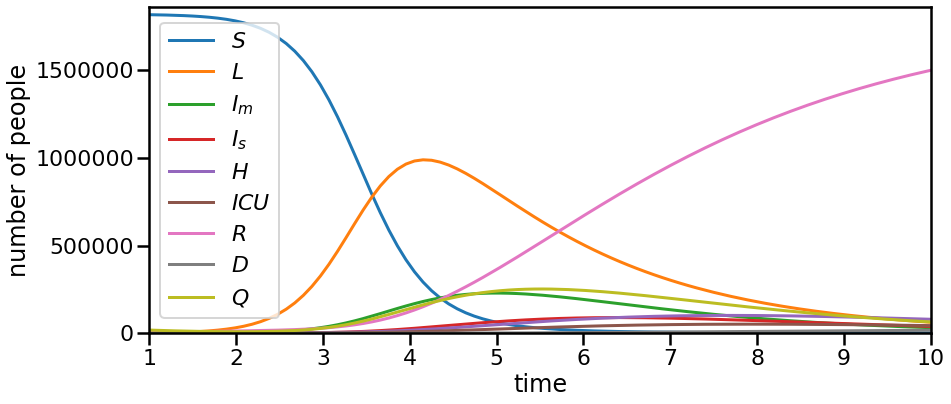

In [5]:
SIRsol = compute_and_plot_ODE(S0, L0, Im0, Is0, H0, ICU0, R0, D0, Q0,t,N,
                     beta1, beta2, beta3, beta4, beta5, 
                     gamma1, gamma2, gamma3, gamma4, 
                     alpha1, alpha2, alpha3, 
                     eps1, eps2, eps3, 
                     delta1, delta2, 
                     kappa_m, kappa_s, kappa_H, kappa_ICU, kappa_Q,
                     10) # <- TendPlot

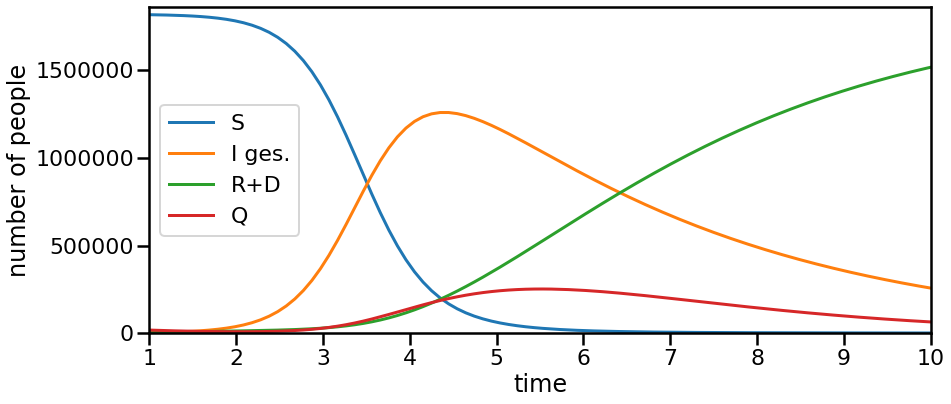

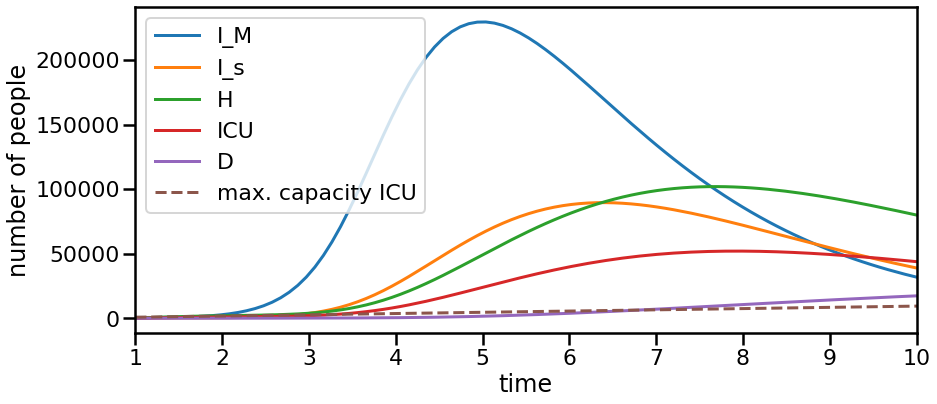

In [6]:
[S,L,Im,Is,H,ICU,R,D,Q] = SIRsol.T
#===================
# plot the solution
#===================
sns.set_context("poster") 
#----
fig, ax = plt.subplots(figsize=(14,6))    
ax.set_xlabel('time')
ax.set_ylabel('number of people')
plt.xlim(np.min(t), 10)  
plt.ylim(-1,N+N*1/100)
#-------
# for i,label in enumerate(["S","L","I_m","I_s","H","ICU","R","D","Q"]):
#     ax.plot(t,SIRsol.T[i],label=r"${}$".format(label),lw = 3)
plt.plot(t, S, label='S')
plt.plot(t, L+Im+Is+H+ICU, label='I ges.')
plt.plot(t, R+D, label='R+D')
plt.plot(t, Q, label='Q')

plt.legend(loc='best')
plt.show()
#===========================
fig2, ax2 = plt.subplots(figsize=(14,6))    
ax2.set_xlabel('time')
ax2.set_ylabel('number of people')
plt.xlim(np.min(t), 10)  
#plt2.ylim(-1,N+N*1/100)
plt.plot(t, Im, label='I_M')
plt.plot(t, Is, label='I_s')
plt.plot(t, H, label='H')
plt.plot(t, ICU, label='ICU')
plt.plot(t, D, label='D')
plt.plot(t, ICUtotal*t, '--',label='max. capacity ICU')
plt.legend(loc='best')
plt.show()

Statt die attack rate $\beta_2$, $\beta_3$, $\beta_4$, $\beta_5$ und die recovery rate $\gamma_1$, $\gamma_2$, $\gamma_3$, $\gamma_4$ in Raten zu definieren, schreibe ich den Code so um, dass man nun die Anzahl Tage angibt, die man benötigt, um von einem Kompartiment ins nächste zu wechseln. Zum Beispiel wird die Angabe $\beta_2=\frac{1}{3}$, die angibt, wie viele Personen/Tag den Wechsel $L \rightarrow I_m$ vollziehen, ersetzt durch die Angabe, dass man (im Schnitt) 3 Tage braucht, um von latent erkrankt zu mild infiziert zu wechseln.
Außerdem werden die Angaben $\kappa_m, \kappa_s, \kappa_H, \kappa_ICU, \kappa_Q$ ersetzt. Diese waren definiert, als zum Beispiel $kappa_m\dot \beta_1=$ Anzahl Kontakte, die eine mild infizierte Person im Schnitt hat. Nun werden genau diese Zahlen direkt abgefragt als 
anz_Kont_m, anz_Kont_s, anz_Kont_H, anz_Kont_ICU, anz_Kont_Q und umgerechnet, indem durch $\beta_1$ geteilt wird.

In [7]:
def compute_and_plot_ODE_inverseRates(S0, L0, Im0, Is0, H0, ICU0, R0, D0, Q0,t,N, 
                         beta1, inversebeta2, inversebeta3, inversebeta4, inversebeta5, 
                         inversegamma1, inversegamma2, inversegamma3, inversegamma4, 
                         alpha1, alpha2, alpha3, 
                         eps1, eps2, eps3, 
                         delta1, delta2, 
                         anz_Kont_m, anz_Kont_s, anz_Kont_H, anz_Kont_ICU, anz_Kont_Q,
                         TendPlot):
    """ computes the complex SIR model defined by dydt for the initial conditions 
    S0, L0, Im0, Is0, H0, ICU0, R0, D0, Q0
    with the parameters 
    beta1, 
    1/beta2, 1/beta3, 1/beta4, 1/beta5, 
    1/gamma1, 1/gamma2, 1/gamma3, 1/gamma4, 
    alpha1, alpha2, alpha3, eps1, eps2, eps3, delta1, delta2, 
    kappa_m, kappa_s, kappa_H, kappa_ICU, kappa_Q
    and the plot setting 
    TendPlot: until what time do you want to see the results in the plot? """
    # Initial conditions
    y0 = [S0, L0, Im0, Is0, H0, ICU0, R0, D0, Q0]    

    beta2, beta3, beta4, beta5 = 1./inversebeta2, 1./inversebeta3, 1./inversebeta4, 1./inversebeta5
    gamma1, gamma2, gamma3, gamma4 = 1./inversegamma1, 1./inversegamma2, 1./inversegamma3, 1./inversegamma4
    kappa_m, kappa_s, kappa_H, kappa_ICU, kappa_Q = anz_Kont_m/beta1, anz_Kont_s/beta1, anz_Kont_H/beta1, anz_Kont_ICU/beta1, anz_Kont_Q/beta1
    
    # solve ODE 
    sol_inverse_rates = odeint(dydt, y0, t, args=(beta1, beta2, beta3, beta4, beta5, gamma1, gamma2, gamma3, gamma4, alpha1, alpha2, alpha3, eps1, eps2, eps3, delta1, delta2, kappa_m, kappa_s, kappa_H, kappa_ICU, kappa_Q))    

    #===================
    # plot the solution
    #===================
    sns.set_context("poster") 
    #plt.style.use('kitishnotex')    
    #----
    fig, ax = plt.subplots(figsize=(14,6))    
    ax.set_xlabel('time')
    ax.set_ylabel('number of people')
    ax.set_xlim(np.min(t), TendPlot)  
    ax.set_ylim(-1,N+N*1/100)
    #-------
    for i,label in enumerate(["S","L","I_m","I_s","H","ICU","R","D","Q"]):
        ax.plot(t,sol_inverse_rates.T[i],label=r"${}$".format(label),lw = 3)

    ax.legend(loc='best')
    plt.savefig('hamburgSIR2.pdf')
    plt.show()

    return sol_inverse_rates
#interact(computeSIRdgl,S0=fixed(S0),I0=fixed(I0),R0=fixed(R0),t=fixed(t),N=fixed(N),beta=(0.1,1.0,0.1),gamma=(1./7.,1.0,0.1))

In [8]:
print(kappa_m, kappa_s, kappa_H, kappa_ICU, kappa_Q)
print(kappa_m*beta1, kappa_s*beta1, kappa_H*beta1, kappa_ICU*beta1, kappa_Q*beta1)

0.8 0.2 0.2 0.1 0.01
2.4000000000000004 0.6000000000000001 0.6000000000000001 0.30000000000000004 0.03


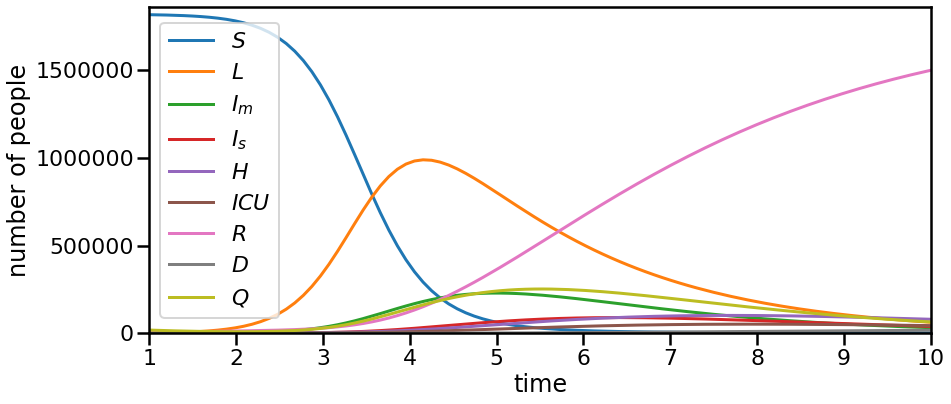

In [9]:
SIRsol_inverse_rates = compute_and_plot_ODE_inverseRates(S0, L0, Im0, Is0, H0, ICU0, R0, D0, Q0,t,N,
                     beta1, 3., 3., 10, 20, 
                     3.0,3.0,3.0,3.0,
                     alpha1, alpha2, alpha3, 
                     eps1, eps2, eps3, 
                     delta1, delta2, 
                     kappa_m*beta1, kappa_s*beta1, kappa_H*beta1, kappa_ICU*beta1, kappa_Q*beta1,
                     10) # <- TendPlot

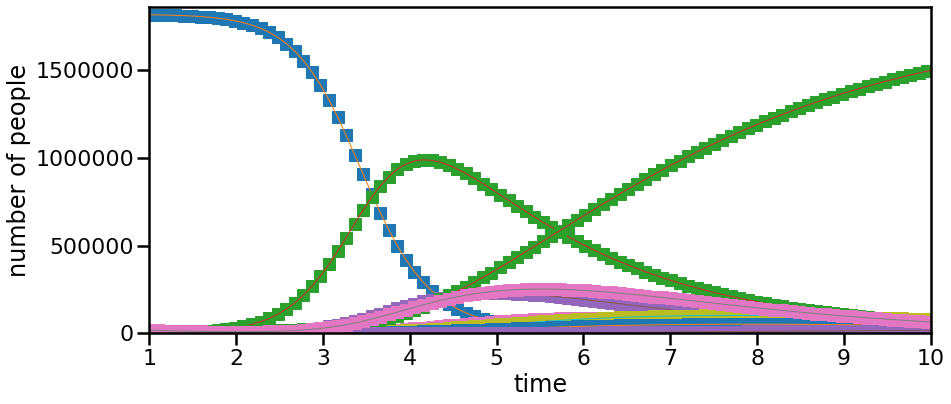

In [10]:
fig, ax = plt.subplots(figsize=(14,6))    
ax.set_xlabel('time')
ax.set_ylabel('number of people')
ax.set_xlim(np.min(t), 10)  
ax.set_ylim(-1,N+N*1/100)
#-------
for i,label in enumerate(["S","L","I_m","I_s","H","ICU","R","D","Q"]):
    ax.plot(t,SIRsol_inverse_rates.T[i],'s',label=r"${}$".format(label),lw = 1)
    ax.plot(t,SIRsol.T[i],label=r"${}$".format(label),lw = 1)

In [11]:
description_style = {'description_width': 'initial'}

interact(compute_and_plot_ODE, 
         S0=fixed(S0),L0=fixed(L0), Im0=fixed(Im0), Is0=fixed(Is0), H0=fixed(H0), ICU0=fixed(ICU0), R0=fixed(R0), D0=fixed(D0), Q0=fixed(Q0),
         t=fixed(t),N=fixed(N),
         beta1=widgets.IntSlider(min=0, max=10, step=1, description=r'Anzahl Kontakte einer latenten Person ($\beta_1$)',value=3,layout=widgets.Layout(width='70%', height='80px'),style=description_style),          
         beta2=widgets.FloatSlider(min=0.0, max=1.0, step=0.1, description=r'Anzahl Tage bis milde Symptome auftreten ($\beta_2$)',value=0.3,layout=widgets.Layout(width="70%"),style=description_style),  
         beta3=widgets.FloatSlider(min=0.0, max=1.0, step=0.1, description=r'$\beta_3$',value=0.3,layout=widgets.Layout(width="70%")),  
         beta4=widgets.FloatSlider(min=0.0, max=1.0, step=0.1, description=r"$\beta_4$",value=0.1), 
         beta5=widgets.FloatSlider(min=0.0, max=0.2, step=0.05, description=r"$\beta_4$",value=0.05), 
         gamma1=fixed(1./3.), gamma2=fixed(1./3.), gamma3=fixed(1./3.), gamma4=fixed(1./3.), 
         alpha1=fixed(0.2), alpha2=fixed(0.5), alpha3=fixed(0.2), 
         eps1=fixed(0.2), eps2=fixed(0.1), eps3=fixed(0.7), delta1=fixed(0.01), delta2=fixed(0.05), 
         kappa_m=0.8,#widgets.IntSlider(min=0, max=beta1, step=1, description='Anzahl Kontakte einer Person mit milden Symptomen',value=2,layout=widgets.Layout(width="70%"),style=description_style)*beta1,#fixed(0.8), 
         kappa_s=fixed(0.2), kappa_H=fixed(0.2), kappa_ICU=fixed(0.1), kappa_Q=fixed(0.01),
         TendPlot=widgets.IntSlider(min=1, max=tsteps, step=1, description='Plot max.',value=10))

interactive(children=(IntSlider(value=3, description='Anzahl Kontakte einer latenten Person ($\\beta_1$)', lay…

<function __main__.compute_and_plot_ODE(S0, L0, Im0, Is0, H0, ICU0, R0, D0, Q0, t, N, beta1, beta2, beta3, beta4, beta5, gamma1, gamma2, gamma3, gamma4, alpha1, alpha2, alpha3, eps1, eps2, eps3, delta1, delta2, kappa_m, kappa_s, kappa_H, kappa_ICU, kappa_Q, TendPlot)>

In [14]:
def calibrate_rates(S0, L0, Im0, Is0, H0, ICU0, R0, D0, Q0,t,N, 
                         beta1, beta2, beta3, beta4, beta5, 
                         gamma1, gamma2, gamma3, gamma4, 
                         alpha1, alpha2, alpha3, 
                         eps1, eps2, eps3, 
                         delta1, delta2, 
                         kappa_m, kappa_s, kappa_H, kappa_ICU, kappa_Q, 
                         TendPlot):
    """ function to calibrate the complex SIR model defined by dydt for the initial conditions 
    S0, L0, Im0, Is0, H0, ICU0, R0, D0, Q0
    with the parameters 
    beta1, beta2, beta3, beta4, beta5, gamma1, gamma2, gamma3, gamma4, alpha1, alpha2, alpha3, eps1, eps2, eps3, delta1, delta2, kappa_m, kappa_s, kappa_H, kappa_ICU, kappa_Q
    and the plot setting 
    TendPlot: until what time do you want to see the result in the plot? """
    # Initial conditions
    y0 = [S0, L0, Im0, Is0, H0, ICU0, R0, D0, Q0]

    # solve ODE 
    sol = odeint(dydt, y0, t, args=(beta1, beta2, beta3, beta4, beta5, gamma1, gamma2, gamma3, gamma4, alpha1, alpha2, alpha3, eps1, eps2, eps3, delta1, delta2, kappa_m, kappa_s, kappa_H, kappa_ICU, kappa_Q))
    [S,L,Im,Is,H,ICU,R,D,Q] = sol.T

    #===================
    # plot the solution
    #===================
    sns.set_context("poster") #                   <<<< Makes everything larger
    #plt.style.use('tableau-colorblind10')#        <<<< Use the colors you want
    #----
    fig, ax = plt.subplots(figsize=(14,6))    
    ax.set_xlabel('time')
    ax.set_ylabel('number of people')
    plt.xlim(np.min(t), TendPlot)  
#     plt.ylim(-1,N+N*1/100)
    #-------
#    for i,label in enumerate(["S","L","I_m","I_s","H","ICU","R","D","Q"]):
#        ax.plot(t,sol.T[i],label=r"${}$".format(label),lw = 3)
#     plt.plot(t, S, label='S')
#     plt.plot(t, L, label='L')
    plt.plot(t, Im+Is, label='Im+Is')
    #plt.plot(t, Is, label='I')
    plt.plot(np.linspace(1,34,34),aktuell_infizierte_Hamburg,'o')
#     plt.plot(t, H, label='H')
#     plt.plot(t, ICU, label='ICU')
#     plt.plot(t, R, label='R')
#     plt.plot(np.linspace(1,len(insg_Genesen_Hamburg),len(insg_Genesen_Hamburg)),insg_Genesen_Hamburg,'o')
#     plt.plot(t, D, label='D')
#     plt.plot(t, Q, label='Q')

    plt.legend(loc='best')
    plt.show()

    return
#interact(computeSIRdgl,S0=fixed(S0),I0=fixed(I0),R0=fixed(R0),t=fixed(t),N=fixed(N),beta=(0.1,1.0,0.1),gamma=(1./7.,1.0,0.1))

NameError: name 'aktuell_infizierte_Hamburg' is not defined

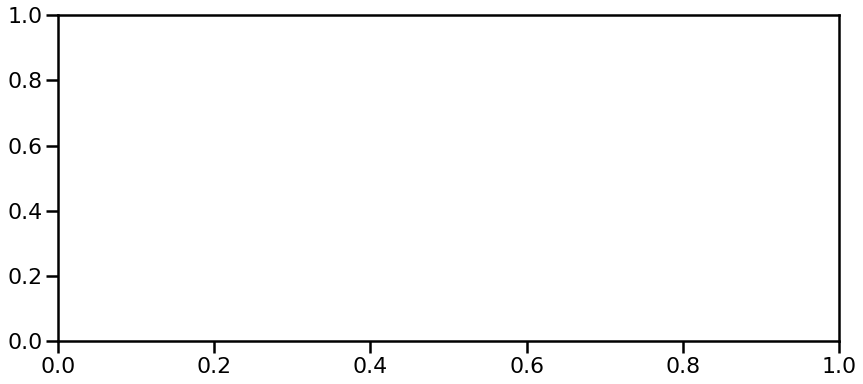

In [15]:
#len(aktuell_infizierte_Hamburg)
tDataPlot=np.linspace(1,34,34)
tDataPlot2=np.linspace(1,18,18)
fig, ax = plt.subplots(figsize=(14,6))
plt.plot(tDataPlot2,aktuell_infizierte_Hamburg[0:18],'o')
plt.plot(tDataPlot2,0.635966*2**(0.461712*tDataPlot2)) # bis Tag 18 optimiert
#plt.plot(tDataPlot2,3.79434*2**(0.316277*tDataPlot2)) # bis Tag 25 optimiert
# my guess: 2**(0.43*tDataPlot2)
print(1/0.461712)
print(1/0.316277)

interactive(children=(FloatSlider(value=0.53, description='beta1', max=1.59, min=-0.53), FloatSlider(value=0.0…

<function __main__.calibrate_rates(S0, L0, Im0, Is0, H0, ICU0, R0, D0, Q0, t, N, beta1, beta2, beta3, beta4, beta5, gamma1, gamma2, gamma3, gamma4, alpha1, alpha2, alpha3, eps1, eps2, eps3, delta1, delta2, kappa_m, kappa_s, kappa_H, kappa_ICU, kappa_Q, TendPlot)>

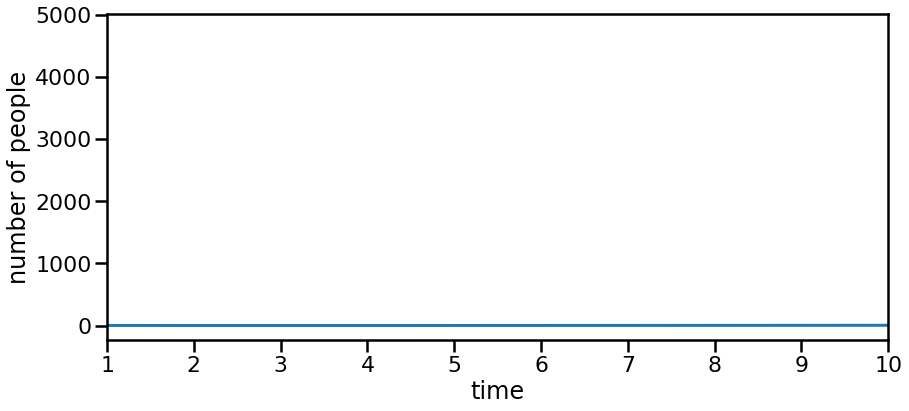

In [16]:
# 27.02. onward
tSim = 34
interact(calibrate_rates, 
         S0=fixed(N),L0=fixed(5), Im0=fixed(1), Is0=fixed(0), H0=fixed(0), ICU0=fixed(0), R0=fixed(0), D0=fixed(0), Q0=fixed(0),
         t=fixed(np.linspace(1, tSim, tSim)),N=fixed(N),
         beta1=0.53,
         beta2=0.05, 
         beta3=0.1, 
         beta4=0.0, 
         beta5=0.0, 
         gamma1=fixed(1./3.), gamma2=fixed(1./3.), gamma3=fixed(1./3.), gamma4=fixed(1./3.), 
         alpha1=fixed(0.2), alpha2=fixed(0.5), alpha3=fixed(0.2), 
         eps1=fixed(0.2), eps2=fixed(0.1), eps3=fixed(0.7), delta1=fixed(0.01), delta2=fixed(0.05), 
         kappa_m=fixed(0.8), kappa_s=fixed(0.2), kappa_H=fixed(0.2), kappa_ICU=fixed(0.1), kappa_Q=fixed(0.01),
         TendPlot=widgets.IntSlider(min=1, max=tSim, step=1, description='Plot max.',value=10))